---
---

<h1><center><ins>Exercise Sheet 3</ins></center></h1>
<h2><center>Numerical Methods <br><br>

---
---

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp

## Exercise 1 - Root finding algorithms

**(A)** Implement the *bisection*, *secant*, *false position* and *Newton-Raphson* root finding methods, by coding your own version of these algorithms. Make sure to test your codes, checking that indeed they are able to find the root of a function (to do this, you can for example pick an analytic function that allows you test the codes and for which you can compute the roots analytically).

**(B)** Use your implementation of the 4 root finding methods (from part **A**) to compute the root of the function:

$$f(x) = e^x - 1 - x - \frac{x^2}{2}$$

in the interval $x\in[-1,2]$. For each method, print out the position of the root and the number of iterations needed to reach it.

**(C)** Discuss your results, commenting how the methods compare to one another. Which one is the fastest/slowest? Why? What is the impact of the points you selected to start your iterations?

In [ ]:
import time
import math


def mySimpleFunction( x ):
  return x - 1                                        # f(x)=x-1

def mySimpleFunctionD( x ):
  return 1                                            # f'(x)=1

def myBetterFunction( x ):
  return x*x + 2*x - 2                                # f(x)=x²+2x-2

def myBetterFunctionD( x ):
  return 2*x + 2                                      # f'(x)=2x+2

def functionB( x ):
  return math.exp( x ) - 1 - x - x*x/2                # f(x)=eˣ-1-x-x²/2

def functionBD( x ):
  return math.exp( x ) - 1 - x                        # f'(x)=eˣ-1-x


def myBisection( aFunction, aDerivative, interval, epsilon ):
  fL= aFunction( interval[0] )                        # f links
  fR= aFunction( interval[1] )                        # f rechts
  if fL * fR > 0:                                     # Nullwert dazwischen?
    return None, 0                                    # nein: Berechnung nicht möglich
  
  m= ( interval[0] + interval[1] ) / 2                # Intervall mittelwert
  fM= aFunction( m )                                  # f Mittelwert
  if -epsilon < fM and fM < epsilon:                  # nahe genug an Null?
    return m, 1                                       # GEFUNDEN!!!
  
  if fL * fM <= 0:                                    # Nullwert in linker Hälfte
    x0, it= myBisection( aFunction, aDerivative, [ interval[0], m ], epsilon )
  else:                                               # Nullwert in rechter Hälfte
    x0, it= myBisection( aFunction, aDerivative, [ m, interval[1] ], epsilon )

  return x0, it+1                                     # Zahl der Iterationen erhöhen


def mySecant( aFunction, aDerivative, interval, epsilon ):
  fL= aFunction( interval[0] )                        # f links
  fR= aFunction( interval[1] )                        # f rechts
  if fL * fR > 0:                                     # Nullwert dazwischen?
    return None, 0                                    # nein: Berechnung nicht möglich
  
  s= interval[1]-(fR/(fR-fL))*(interval[1]-interval[0])
  fS= aFunction( s )                                  # f Approximation
  if -epsilon < fS and fS < epsilon:                  # nahe genug an Null?
    return s, 1                                       # GEFUNDEN!!!
  
  x0, it= mySecant( aFunction, aDerivative, [ s, interval[1] ], epsilon )

  return x0, it+1                                     # Zahl der Iterationen erhöhen


def myFPM( aFunction, aDerivative, interval, epsilon ):
  fL= aFunction( interval[0] )                        # f links
  fR= aFunction( interval[1] )                        # f rechts
  if fL * fR > 0:                                     # Nullwert dazwischen?
    return None, 0                                    # nein: Berechnung nicht möglich
  
  s= interval[1]-(fR/(fR-fL))*(interval[1]-interval[0])
  fS= aFunction( s )                                  # f Approximation
  if -epsilon < fS and fS < epsilon:                  # nahe genug an Null?
    return s, 1                                       # GEFUNDEN!!!
  
  if fL * fS <= 0:                                    # Nullwert in linker Hälfte
    x0, it= mySecant( aFunction, aDerivative, [ interval[0], s ], epsilon )
  else:                                               # Nullwert in rechter Hälfte
    x0, it= mySecant( aFunction, aDerivative, [ s, interval[1] ], epsilon )

  return x0, it+1                                     # Zahl der Iterationen erhöhen


def myNRM( aFunction, aDerivative, x1, epsilon ):
  fX= aFunction( x1 )                                 # f(x1)
  if -epsilon < fX and fX < epsilon:                  # nahe genug an Null?
    return x1, 1                                      # GEFUNDEN!!!
    
  fXd= aDerivative( x1 )                              # f'(x1)
  if fXd == 0.:                                       # horizontale Tangente?
    return None, 0                                    # ja: Berechnung nicht möglich
  
  x2= x1 - fX / fXd
  x0, it= myNRM( aFunction, aDerivative, x2, epsilon )
  return x0, it+1                                     # Zahl der Iterationen erhöhen


lastName= ""
for f, df, interval, epsilon, algo in [
  [ mySimpleFunction, mySimpleFunctionD, [ -1., 2. ], 1.e-5, myBisection ],
  [ myBetterFunction, myBetterFunctionD, [ -1., 2. ], 1.e-5, myBisection ],
  [ functionB,        functionBD,        [ -1., 2. ], 1.e-5, myBisection ],
  [ mySimpleFunction, mySimpleFunctionD, [ -1., 2. ], 1.e-5, mySecant ],
  [ myBetterFunction, myBetterFunctionD, [ -1., 2. ], 1.e-5, mySecant ],
  [ functionB,        functionBD,        [ -1., 2. ], 1.e-5, mySecant ],
  [ mySimpleFunction, mySimpleFunctionD, [ -1., 2. ], 1.e-5, myFPM ],
  [ myBetterFunction, myBetterFunctionD, [ -1., 2. ], 1.e-5, myFPM ],
  [ functionB,        functionBD,        [ -1., 2. ], 1.e-5, myFPM ],
  [ mySimpleFunction, mySimpleFunctionD, 2.,          1.e-5, myNRM ],
  [ myBetterFunction, myBetterFunctionD, 2.,          1.e-5, myNRM ],
  [ functionB,        functionBD,        2.,          1.e-5, myNRM ]
  ]:
  start= time.perf_counter()
  x0, iterations= algo( f, df, interval, epsilon )
  duration= time.perf_counter() - start

  name= algo.__name__
  if lastName != name:
    lastName= name
    print()
    print( f'{name}:' )
  if iterations > 0:
    y0= f( x0 )
    print( f'{f.__name__} {interval}: x₀={x0:.5f}, y₀={y0:.5f}, n={iterations}, t={duration:.6f}s' )
  else:
    print( f'{f.__name__} {interval}: NO SOLUTION' )


#
# Optimierungen:
#  anfängliches fL*fR heraus nehmen (nur 1x ausführen)
#  fL,fM,fR bei Rekursion übergeben, uund nicht erneut berechnen
#
#  numpy.fload128 für bessere Genauigkeit
#


myBisection:
mySimpleFunction [-1.0, 2.0]: x₀=0.99999, y₀=-0.00001, n=17, t=0.000053s
myBetterFunction [-1.0, 2.0]: x₀=0.73205, y₀=0.00000, n=18, t=0.000063s
functionB [-1.0, 2.0]: x₀=0.03125, y₀=0.00001, n=5, t=0.000037s

mySecant:
mySimpleFunction [-1.0, 2.0]: x₀=1.00000, y₀=0.00000, n=1, t=0.000006s
myBetterFunction [-1.0, 2.0]: x₀=0.73205, y₀=-0.00001, n=11, t=0.000041s
functionB [-1.0, 2.0]: x₀=-0.03927, y₀=-0.00001, n=2274, t=0.013804s

myFPM:
mySimpleFunction [-1.0, 2.0]: x₀=1.00000, y₀=0.00000, n=1, t=0.000005s
myBetterFunction [-1.0, 2.0]: x₀=0.73205, y₀=-0.00001, n=11, t=0.000020s
functionB [-1.0, 2.0]: x₀=-0.03927, y₀=-0.00001, n=2274, t=0.014888s

myNRM:
mySimpleFunction 2.0: x₀=1.00000, y₀=0.00000, n=2, t=0.000011s
myBetterFunction 2.0: x₀=0.73205, y₀=0.00000, n=5, t=0.000010s
functionB 2.0: x₀=0.03082, y₀=0.00000, n=12, t=0.000019s


## Exercise 2 - Sets of linear equations

Determine the solution to the following set of linear equations:

$$ 
\begin{cases}
5 x_1 + 3 x_2 &= 15 \\
x_1 - 4 x_2 &= -2 \ ,
\end{cases}
$$

where $x_1$ and $x_2$ are the variables of interest.

**(A)** Formulate the problem by using the matrix representation, as we saw in class, clearly defining the coefficient matrix and the vector of right-hand-side values.

**(B)** Using the appropriate built-in python functions, carry out the LU decomposition of the coefficient matrix, and print out the L and U matrices separately. Solve the set of equations and check that the solution is indeed valid.

**(C)** What is the solution to the following set of equations? 

$$ 
\begin{cases}
x_1 - 4 x_2 &= 3 \\
5 x_1 + 3 x_2 &= -7
\end{cases}
$$

Print out the solution, and motivate the steps you took to solve it.

<div style="background:#404040;">

**(ad A)** Matrix representation:

$$
A\cdot
x=b
\quad
A=
\begin{bmatrix}
5 & 3 \\
1 & -4
\end{bmatrix}
\quad
b=
\begin{bmatrix}
15 \\
-2
\end{bmatrix}
\quad
\begin{pmatrix}
5 & 3 \\
1 & -4
\end{pmatrix}
\cdot
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}^{\mathsf{T}}
=
\begin{pmatrix}
15 \\
-2
\end{pmatrix}
$$
</div>

In [ ]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve
from scipy.linalg import solve

A= np.array( [ [5, 3],
               [1, -4] ], dtype=float)
b= np.array( [15, -2], dtype=float)

lu, piv= lu_factor( A )
U = np.triu(lu)
L = np.tril(lu)
print( f'U={U}' )
print( f'L={L}' )

x1, x2= lu_solve( (lu, piv), b )
b1= 5*x1 + 3*x2
b2= 1*x1 - 4*x2
print()
print( f'x1={x1:.3f}, x2={x2:.3f}, b=({b1:.3f}, {b2:.3f})' )



A= np.array( [ [1, -4],
               [5, 3] ], dtype=float)
b= np.array( [3, -7], dtype=float)

x1, x2= solve( A, b )
b1= 1*x1 - 4*x2
b2= 5*x1 + 3*x2
print()
print( f'x1={x1:.3f}, x2={x2:.3f}, b=({b1:.3f}, {b2:.3f})' )


U=[[ 5.   3. ]
 [ 0.  -4.6]]
L=[[ 5.   0. ]
 [ 0.2 -4.6]]

x1=2.348, x2=1.087, b=(15.000, -2.000)

x1=-0.826, x2=-0.957, b=(3.000, -7.000)


## Exercise 3 - Velocity dispersion estimation

The file ``omega_Cen_Sollima2009.txt`` contains a collection of measurements of line-of-sight velocities of stars in the Galactic globular cluster $\omega$ Cen (NGC 5139). The first column in the file contains the values of the velocities (in km/s), and the second column the values of the associated measurement errors (also in km/s). These data are taken from [Sollima et al. (2009)](https://ui.adsabs.harvard.edu/abs/2009MNRAS.396.2183S/abstract).

We want to determine the mean velocity $\bar{v}$ and velocity dispersion $\sigma$ of these stars, and we do this by using a maximum likelihood estimator, following the procedure described by [Pryor and Meylan (1993)](https://ui.adsabs.harvard.edu/abs/1993ASPC...50..357P/abstract).

We start by assuming that each velocity measurement $v_i$ ($i = 1,2,...,N$), with associated error $\delta_{{\rm v},i}$, is drawn from the normal distribution:

$$ f(v_i) = \frac{1}{\sqrt{2 \pi (\sigma^2 + \delta_{{\rm v},i}^2)}} \exp\left[ - \frac{(v_i - \bar{v})^2}{2(\sigma^2 + \delta_{{\rm v},i}^2)} \right]$$

Standard techniques for forming the likelihood of a set of $N$ velocities and finding its maximum lead to the following two equations:

$$\sum_{i = 1}^{N}  \frac{v_i}{(\sigma^2 + \delta_{{\rm v},i}^2)} - \bar{v} \sum_{i = 1}^{N}  \frac{1}{(\sigma^2 + \delta_{{\rm v},i}^2)} = 0$$

$$\sum_{i = 1}^{N}  \frac{(v_i - \bar{v})^2}{(\sigma^2 + \delta_{{\rm v},i}^2)^2} - \sum_{i = 1}^{N}  \frac{1}{(\sigma^2 + \delta_{{\rm v},i}^2)} = 0$$

These equations must be solved numerically to obtain $\bar{v}$ and $\sigma$.

**(A)** Discuss what type of problem this is, and list the possible ways (those we have seen in class, of course!) to solve it numerically with built-in python functions.

**(B)** Solve the equations above to obtain the values of the mean velocity $\bar{v}$ and velocity dispersion $\sigma$. To do this, use **all** the python built-in functions we discussed in class, and compare the results you obtain. Print out the solutions you get, and verify that they are indeed solutions of the above equations.

**(C)** Explore the input and output of the python built-in functions. Pay particular attention to the values you provide as initial guesses to compute the solution: which values break the algorithm? Which algorithm appears to be more stable?

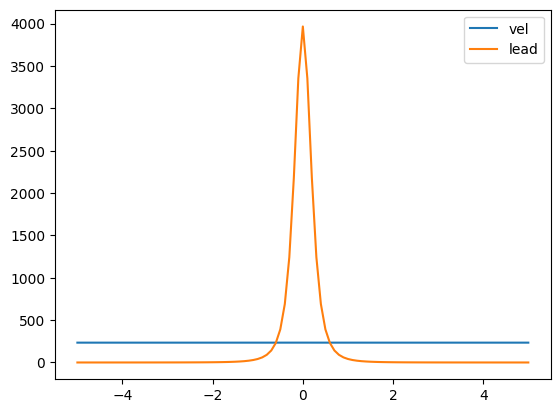

In [ ]:
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt

#
# daten in globale variablen
#
cen= np.genfromtxt( 'omega_Cen_Sollima2009.txt', delimiter='\t', dtype=float )
N= len(cen)

#
# umformen der 1. Gleichung auf v(σ)=∑links/∑rechts
# Index i ist verschoben von 1..N auf 0..N-1!
#
def vquer( s ):
  sumL= 0
  sumR= 0
  s2= s**2
  for i in range(N):
    vi= cen[i][0]
    di= cen[i][1]
    d2= di**2
    s2d2= s2 + d2
    sumL+= vi / s2d2
    sumR+= 1 / s2d2
  return sumL/sumR

def lead( s ):
  sumL= 0
  sumR= 0
  s2= s**2
  v= vquer(s)
  for i in range(N):
    vi= cen[i][0]
    di= cen[i][1]
    d2= di**2
    s2d2= s2 + d2
    sumL+= ( ( vi - v ) / s2d2 )**2
    sumR+= 1 / s2d2
    return sumL - sumR

#
# plot the curves
#
X= []
V= []
L= []
for i in range( -50, 51 ):
  x= i / 10.
  X.append( x )
  V.append( vquer( x ) )
  L.append( lead( x ) )

plt.plot( X, V, label='vquer' )
plt.plot( X, L, label='lead' )
plt.legend()
plt.show()

#s0= opt.newton( lead, x0=-10, x1=10, tol=1.e-12, maxiter=100 )  # Sekantenmethode
#print(s0)



#EOF